In [3]:
import turicreate

In [4]:
tmp=turicreate.SArray([1, 2, 3, 4])
tmp_cubed=tmp.apply(lambda x: x**3)
print(tmp)
print(tmp_cubed)

[1, 2, 3, 4]
[1, 8, 27, 64]


In [5]:
def polynomial_sframe(feature, degree):
    # assume that degree >= 1
    # initialize the SFrame:
    poly_sframe = turicreate.SFrame()
    # and set poly_sframe['power_1'] equal to the passed feature
    poly_sframe['power_1']=feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        # range usually starts at 0 and stops at the endpoint-1. We want it to start at 2 and stop at degree
        for power in range(2, degree+1): 
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # then assign poly_sframe[name] to the appropriate power of feature
            poly_sframe[name]=feature.apply(lambda x: x**power)
    return poly_sframe

In [6]:
polynomial_sframe(tmp, 4)

power_1,power_2,power_3,power_4
1,1,1,1
2,4,8,16
3,9,27,81
4,16,64,256


In [7]:
sales= turicreate.SFrame('kc_house_data.csv')

Finished parsing file /home/arkojit/ML Regression/kc_house_data.csv

Parsing completed. Parsed 100 lines in 0.097078 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,float,int,float,int,int,float,int,int,int,int,int,int,int,int,int,float,float,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /home/arkojit/ML Regression/kc_house_data.csv

Parsing completed. Parsed 21613 lines in 0.097996 secs.

In [8]:
sales=sales.sort(['sqft_living','price'])

In [9]:
poly1_data = polynomial_sframe(sales['sqft_living'], 1)
poly1_data['price'] = sales['price'] # add price to the data since it's the target

In [10]:
model1 = turicreate.linear_regression.create(poly1_data, target = 'price', features = ['power_1'], validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 1.014526     | 4362074.683616     | 261440.790302                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [11]:
model1.coefficients

name,index,value,stderr
(intercept),None,-43579.08801882912,4402.689690321088
power_1,None,280.6227721496458,1.936398552006473


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

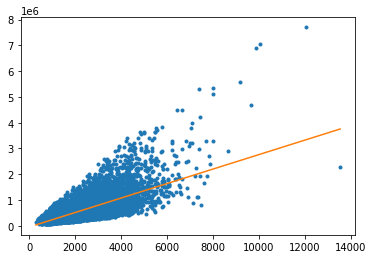

In [13]:
plt.plot(poly1_data['power_1'],poly1_data['price'],'.',
         poly1_data['power_1'], model1.predict(poly1_data),'-')

In [14]:
poly2_data = polynomial_sframe(sales['sqft_living'], 2)
my_features = poly2_data.column_names() # get the name of the features
poly2_data['price'] = sales['price'] # add price to the data since it's the target
model2 = turicreate.linear_regression.create(poly2_data, target = 'price', features = my_features, validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 2

Number of unpacked features : 2

Number of coefficients    : 3

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.019521     | 5913021.143248     | 250948.367620                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [15]:
model2.coefficients

name,index,value,stderr
(intercept),None,199222.5015927106,7058.004803507182
power_1,None,67.99405839971985,5.287871989180487
power_2,None,0.03858123253668593,0.000898246542958666


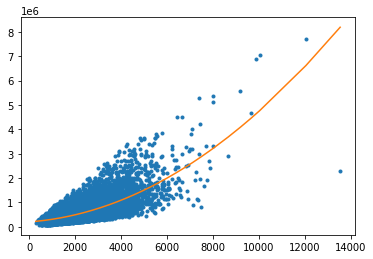

In [16]:
plt.plot(poly2_data['power_1'],poly2_data['price'],'.',
         poly2_data['power_1'], model2.predict(poly2_data),'-')

In [17]:
poly3_data = polynomial_sframe(sales['sqft_living'], 3)
my_features = poly3_data.column_names() # get the name of the features
poly3_data['price'] = sales['price'] # add price to the data since it's the target
model3 = turicreate.linear_regression.create(poly3_data, target = 'price', features = my_features, validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 3

Number of unpacked features : 3

Number of coefficients    : 4

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.028870     | 3261066.776472     | 249261.285049                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [18]:
model3.coefficients

name,index,value,stderr
(intercept),None,336788.1292483249,10661.015315839628
power_1,None,-90.14763634796351,10.622289129142938
power_2,None,0.08703671850444349,0.002966306216047122
power_3,None,-3.839852291218295e-06,2.2417490842345572e-07


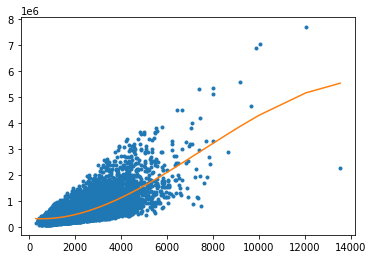

In [19]:
plt.plot(poly3_data['power_1'],poly3_data['price'],'.',
         poly3_data['power_1'], model3.predict(poly3_data),'-')

In [20]:
poly15_data = polynomial_sframe(sales['sqft_living'], 15)
my_features = poly15_data.column_names() # get the name of the features
poly15_data['price'] = sales['price'] # add price to the data since it's the target
model4 = turicreate.linear_regression.create(poly15_data, target = 'price', features = my_features, validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.028315     | 2623876.191481     | 245489.785164                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [21]:
model4.coefficients

name,index,value,stderr
(intercept),None,30588.864690329123,155648.51992790075
power_1,None,517.3637279478762,489.31316833472613
power_2,None,-0.3186192828416619,0.5843871648737171
power_3,None,0.00010582241571752463,0.00032960293014326186
power_4,None,-1.0402076475957452e-08,7.949172895842063e-08
power_5,None,-2.0882692433160964e-14,4.890156609601364e-15
power_6,None,-5.940182378310562e-16,5.251738357086068e-16
power_7,None,2.059688970396844e-21,3.413432956325247e-18
power_8,None,2.5393399668660094e-25,1.8246651836161533e-21
power_9,None,6.749255354614606e-30,4.546788432264372e-25


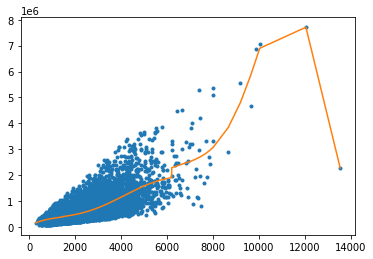

In [22]:
plt.plot(poly15_data['power_1'],poly2_data['price'],'.',
         poly15_data['power_1'], model4.predict(poly15_data),'-')

In [24]:
bigset1, bigset2= sales.random_split(0.5, seed=0)
set1, set2= bigset1.random_split(0.5, seed=0)
set3, set4= bigset2.random_split(0.5, seed=0)

# set1

In [28]:
set1_data = polynomial_sframe(set1['sqft_living'], 15)
my_features = set1_data.column_names() # get the name of the features
set1_data['price'] = set1['price'] # add price to the data since it's the target
model5 = turicreate.linear_regression.create(set1_data, target = 'price', features = my_features, validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 5404

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.031056     | 2215670.450334     | 248785.193866                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [41]:
print(model5.coefficients[model5.coefficients['name']=='power_15'])

+----------+-------+-----------------------+--------+
|   name   | index |         value         | stderr |
+----------+-------+-----------------------+--------+
| power_15 |  None | 6.696099528182773e-55 |  nan   |
+----------+-------+-----------------------+--------+
[? rows x 4 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.


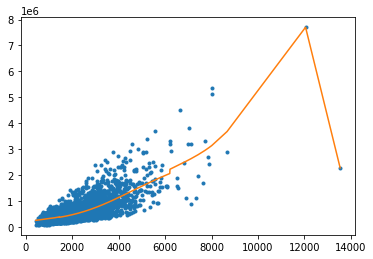

In [30]:
plt.plot(set1_data['power_1'],set1_data['price'],'.',
         set1_data['power_1'], model5.predict(set1_data),'-')

# set2

In [31]:
set2_data = polynomial_sframe(set2['sqft_living'], 15)
my_features = set2_data.column_names() # get the name of the features
set2_data['price'] = set2['price'] # add price to the data since it's the target
model6 = turicreate.linear_regression.create(set2_data, target = 'price', features = my_features, validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 5398

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.036990     | 2118111.720094     | 234588.954297                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [40]:
print(model6.coefficients[model6.coefficients['name']=='power_15'])

+----------+-------+-------------------------+-----------------------+
|   name   | index |          value          |         stderr        |
+----------+-------+-------------------------+-----------------------+
| power_15 |  None | -1.3781825380650875e-52 | 2.803696356945293e-49 |
+----------+-------+-------------------------+-----------------------+
[? rows x 4 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.


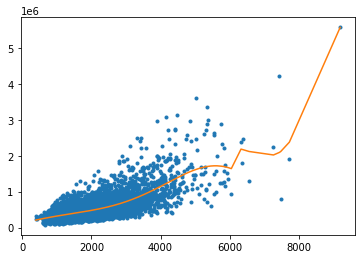

In [33]:
plt.plot(set2_data['power_1'],set2_data['price'],'.',
         set2_data['power_1'], model6.predict(set2_data),'-')

# set3

In [36]:
set3_data = polynomial_sframe(set3['sqft_living'], 15)
my_features = set3_data.column_names() # get the name of the features
set3_data['price'] = set3['price'] # add price to the data since it's the target
model7 = turicreate.linear_regression.create(set3_data, target = 'price', features = my_features, validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 5409

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.027587     | 2122192.859296     | 250359.407640                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [39]:
print(model7.coefficients[model7.coefficients['name']=='power_15'])

+----------+-------+------------------------+------------------------+
|   name   | index |         value          |         stderr         |
+----------+-------+------------------------+------------------------+
| power_15 |  None | 4.8142367181771016e-54 | 1.0559144411409233e-48 |
+----------+-------+------------------------+------------------------+
[? rows x 4 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.


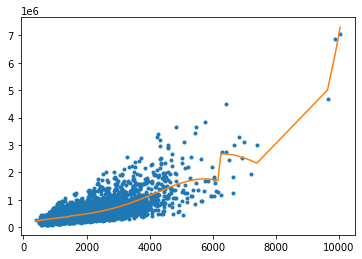

In [42]:
plt.plot(set3_data['power_1'],set3_data['price'],'.',
         set3_data['power_1'], model7.predict(set3_data),'-')

# set4

In [43]:
set4_data = polynomial_sframe(set4['sqft_living'], 15)
my_features = set4_data.column_names() # get the name of the features
set4_data['price'] = set4['price'] # add price to the data since it's the target
model8 = turicreate.linear_regression.create(set4_data, target = 'price', features = my_features, validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 5402

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.029084     | 2314837.236641     | 244589.788422                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [44]:
print(model8.coefficients[model8.coefficients['name']=='power_15'])

+----------+-------+------------------------+------------------------+
|   name   | index |         value          |         stderr         |
+----------+-------+------------------------+------------------------+
| power_15 |  None | -4.753434782943969e-51 | 1.9697681519753573e-47 |
+----------+-------+------------------------+------------------------+
[? rows x 4 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.


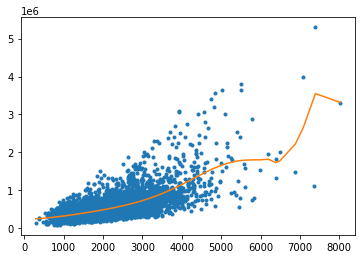

In [46]:
plt.plot(set4_data['power_1'],set4_data['price'],'.',
         set4_data['power_1'], model8.predict(set4_data),'-')

# validation set

In [48]:
tv, test_data= sales.random_split(.9, seed=1)
train_data, validation_data= tv.random_split(0.5, seed=1)

In [79]:
arr=[]
for degree in range(1, 16):
    poly_data = polynomial_sframe(train_data['sqft_living'], degree)
    my_features = poly_data.column_names() # get the name of the features
    poly_data['price'] = train_data['price'] # add price to the data since it's the target
    model = turicreate.linear_regression.create(poly_data, target = 'price', features = my_features, validation_set = None, verbose=False, l2_penalty=0., l1_penalty=0.)
    
    validation_data_poly=polynomial_sframe(validation_data['sqft_living'], degree)
    validation_data_poly['price'] = validation_data['price'] # add price to the data since it's the target
    predictions=model.predict(validation_data_poly)
    resi=validation_data['price']-predictions
    rss=(resi*resi).sum()
    arr.append(rss)

In [81]:
print(arr.index(min(arr)), min(arr))

6 593554790268692.5


In [68]:
arr2=[]
for degree in range(1, 16):
    poly_data = polynomial_sframe(train_data['sqft_living'], degree)
    my_features = poly_data.column_names() # get the name of the features
    poly_data['price'] = train_data['price'] # add price to the data since it's the target
    model = turicreate.linear_regression.create(poly_data, target = 'price', features = my_features, validation_set = None, verbose=False)
    
    test_data_poly=polynomial_sframe(test_data['sqft_living'], degree)
    test_data_poly['price'] = test_data['price'] # add price to the data since it's the target
    predictions=model.predict(test_data_poly)
    resi=test_data['price']-predictions
    rss=(resi*resi).sum()
    arr2.append(rss)

    

In [76]:
print(arr2.index(min(arr2)), min(arr2))

8 124531865613225.9


In [74]:
arr2[6]

126420040806954.78

In [77]:
arr2

[129030484475700.88,
 125190130816999.38,
 125939470212237.94,
 127147732474431.5,
 127140257941432.0,
 127104243352671.1,
 126420040806954.78,
 124559824378770.62,
 124531865613225.9,
 124623122822842.16,
 124702677543935.88,
 124739624423216.47,
 124742030971797.9,
 124726970579248.83,
 124706457359831.14]

In [78]:
arr

[676709767608078.2,
 607090520315223.2,
 616714569189869.1,
 609129223867891.5,
 609124227178597.8,
 609040508807996.6,
 593628665462881.9,
 603283328435405.1,
 619863278571379.8,
 636820305314474.2,
 651790279903069.2,
 660275878506791.5,
 660977723274569.2,
 655354573023552.5,
 645631110506853.5]